In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append(os.path.abspath('../'))

import warnings
warnings.filterwarnings("ignore")

from server2022.src.train_val import *
from server2022.src.model_features import *
from server2022.data.processed.prepare_data import *

### All features

In [2]:
df = create_df_1year_known()

In [4]:
feat_gen = Feature_gen(-3, -1)
df = feat_gen.preprocessing_before_fitting(df)

KeyError: '-2, Нематериальные активы, RUB'

In [ ]:
df.head(3)

In [32]:
# {'class_w': 0.0032972118958329816, 'learning_rate': 0.20737970894242302}
# {'depth': 5.0, 'learning_rate': 0.004092205305603744}
# {'depth': 5.0, 'learning_rate': 0.007199951597758292}

model = CatBoostClassifier(iterations=500,
                               depth=5, 
                               l2_leaf_reg=5, 
                               learning_rate=0.001, # 0.01433
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, 0.01], #0.0006
                               random_seed=RANDOM_STATE,
                              )

Choose target: 1 - binary_target, 2 - target_more30days, 3 - target_more90days:


 1


Fitting model <catboost.core.CatBoostClassifier object at 0x0000017E1789F100> with threshold = 0.5...

TRAIN: F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.2884, ROC_AUC = 0.7522
TEST: F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7811

Fitting model <catboost.core.CatBoostClassifier object at 0x0000017E1789F100> with threshold = 0.21444...


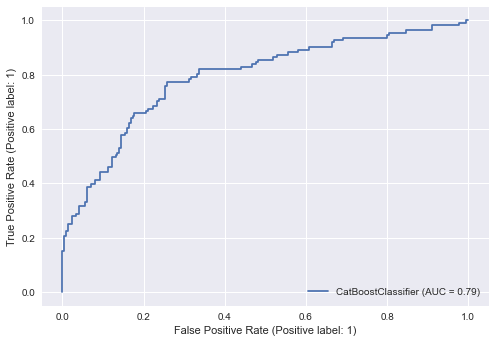

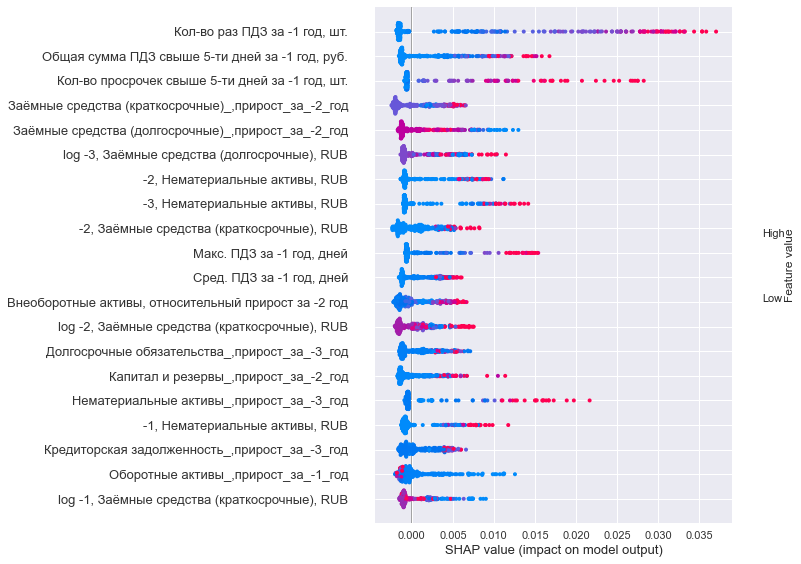


TRAIN: F1 = 0.4059, Precision = 0.8435, Recall = 0.2672, Accuracy = 0.4652, ROC_AUC = 0.6999
TEST: F1 = 0.59, Precision = 0.6629, Recall = 0.5315, Accuracy = 0.7477, ROC_AUC = 0.7918



In [33]:
make_report_with_best_threshold(model, df, to_file=False, file_path='../reports/report_1_test.csv')

## No features

In [7]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False)

In [8]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Fitting model <catboost.core.CatBoostClassifier object at 0x0000018AD6EB9EE0> with treshold = 0.5...


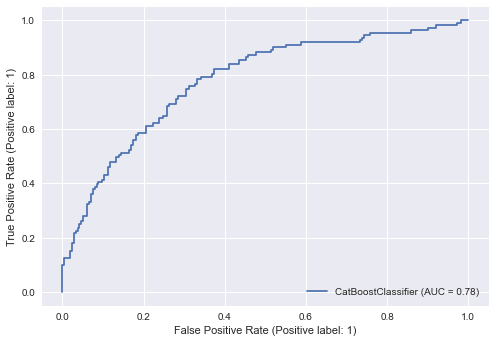

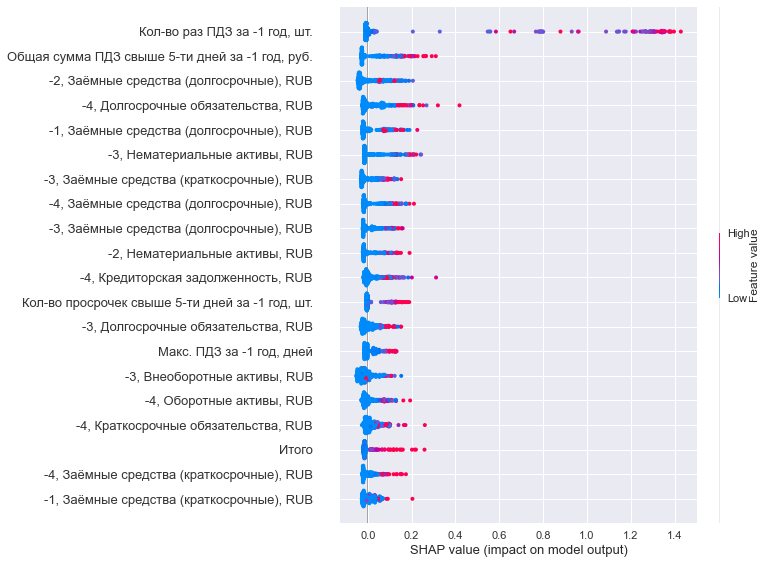

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7785
Fitting model <catboost.core.CatBoostClassifier object at 0x0000018AD6EB9EE0> with treshold = 0.0...


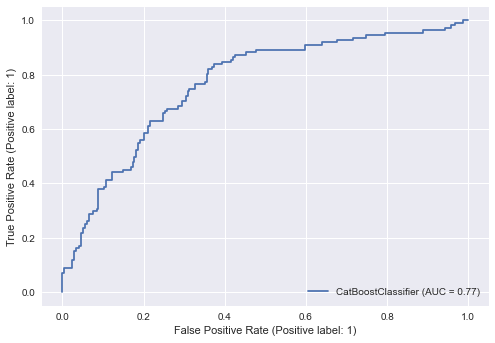

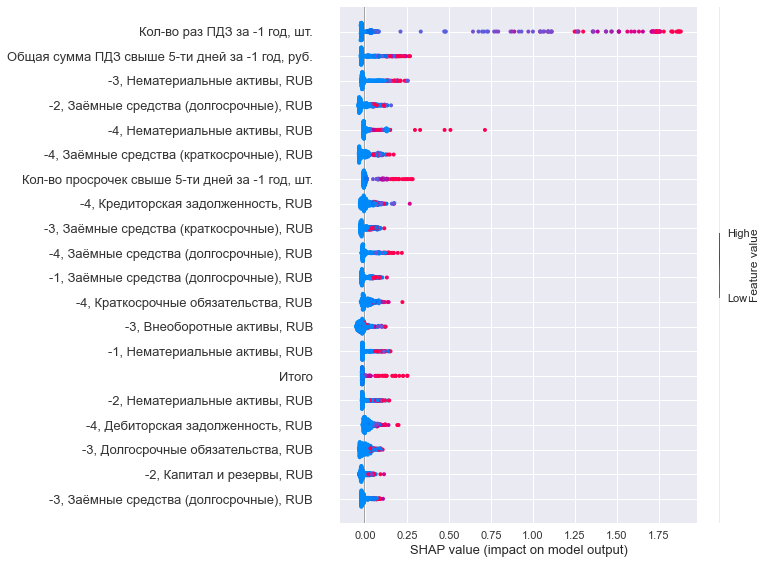

F1 = 0.5606, Precision = 0.4, Recall = 0.9369, Accuracy = 0.4985, ROC_AUC = 0.7666


In [9]:
make_report_with_best_threshold(model, df, to_file=False, file_path='../reports/report_1_test.csv', comment='no_features')

## use_diff_features=True

In [10]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False)

In [11]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

Fitting model <catboost.core.CatBoostClassifier object at 0x0000018AD7178400> with treshold = 0.5...


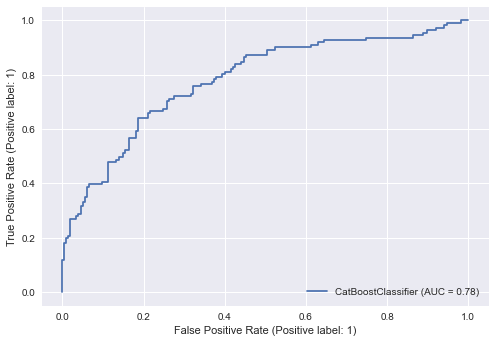

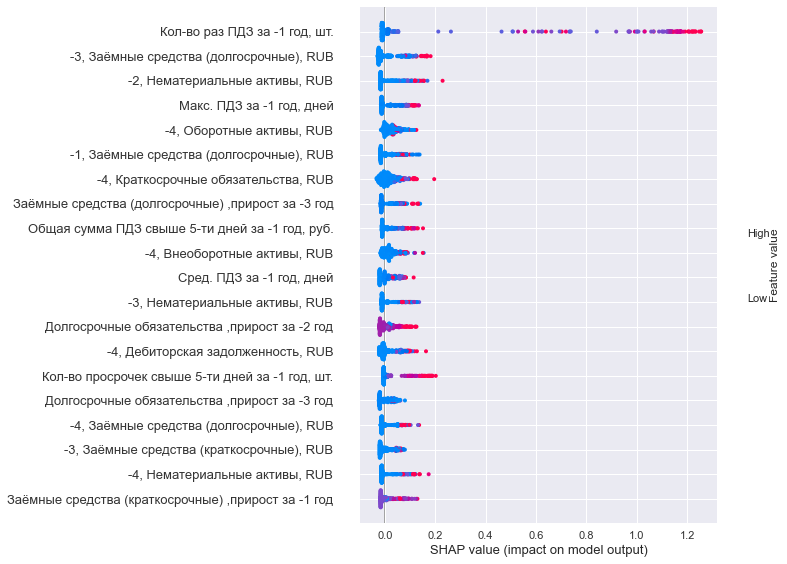

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7807
Fitting model <catboost.core.CatBoostClassifier object at 0x0000018AD7178400> with treshold = 0.0...


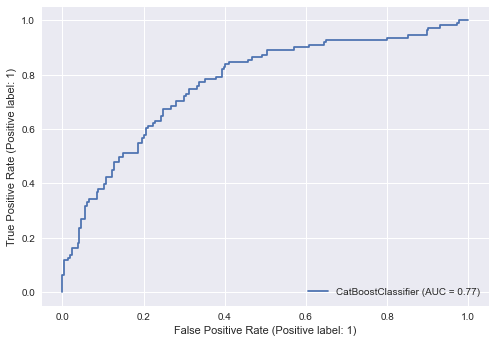

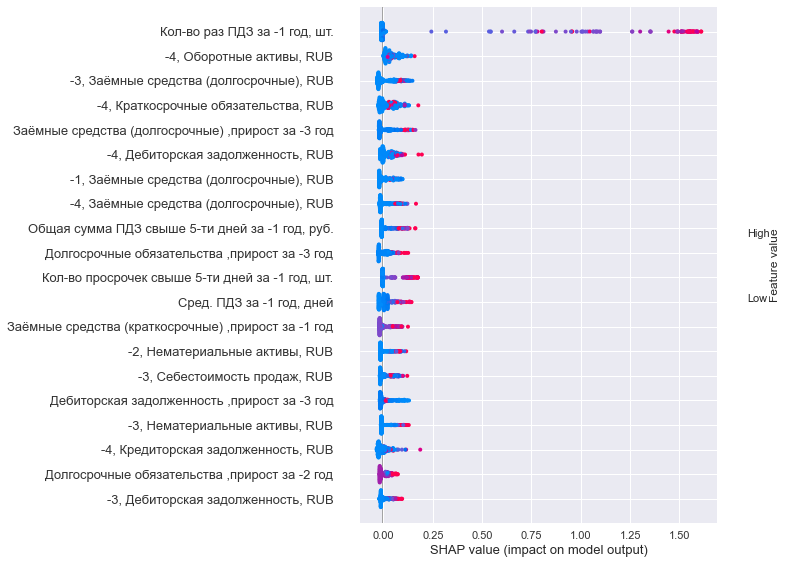

F1 = 0.5568, Precision = 0.3977, Recall = 0.9279, Accuracy = 0.4954, ROC_AUC = 0.768


In [12]:
make_report_with_best_threshold(model, df, to_file=False, file_path='../reports/report_1_test.csv', comment='use_diff_features=True')

## use_ratio_features=True

In [13]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False)

In [14]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=True)

Fitting model <catboost.core.CatBoostClassifier object at 0x0000018AD72423A0> with treshold = 0.5...


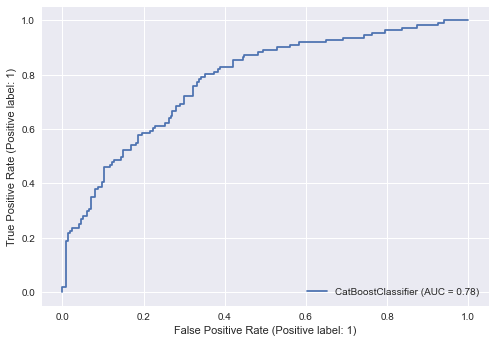

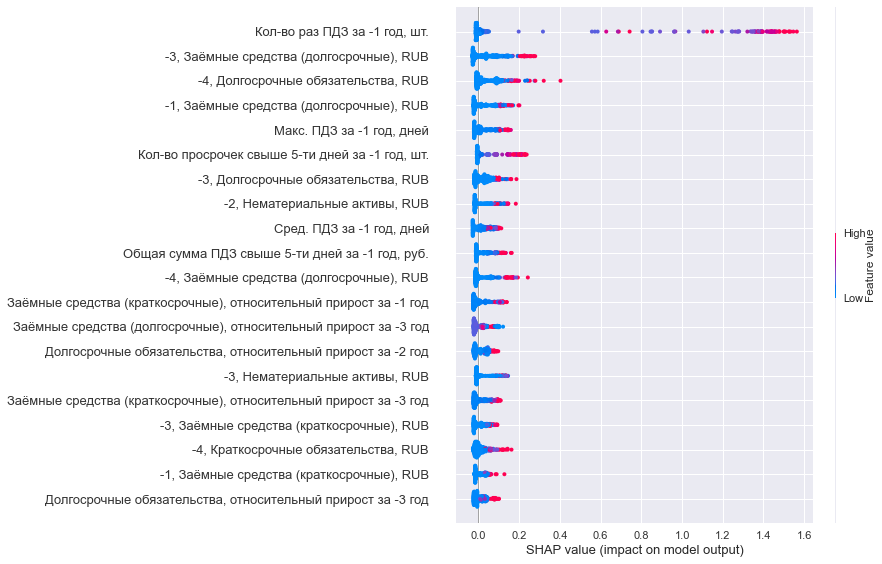

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7789
Fitting model <catboost.core.CatBoostClassifier object at 0x0000018AD72423A0> with treshold = 0.0...


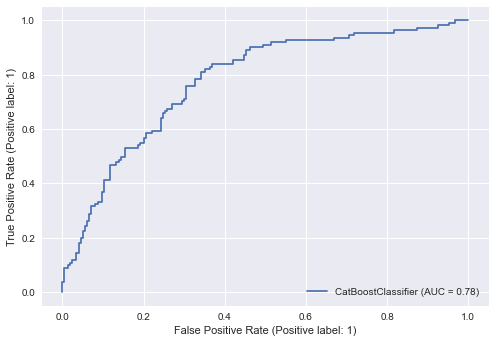

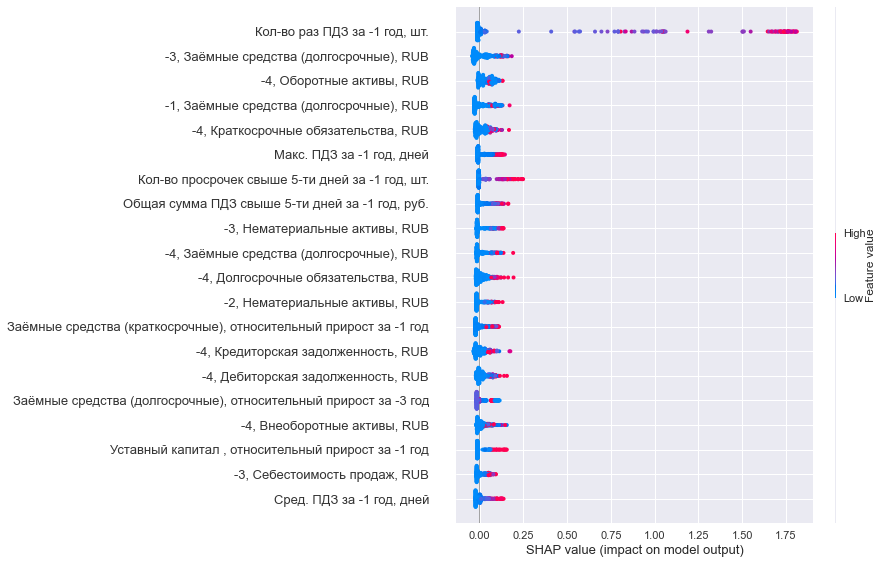

F1 = 0.5422, Precision = 0.3786, Recall = 0.955, Accuracy = 0.4492, ROC_AUC = 0.7773


In [15]:
make_report_with_best_threshold(model, df, to_file=False, file_path='../reports/report_1_test.csv', comment='use_ratio_features=True')

## add_growth=True

In [16]:
df = create_df_1year_known(add_growth=True, count_log_fin_vals=False, normalize_fin_columns=False)

In [17]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Fitting model <catboost.core.CatBoostClassifier object at 0x0000018AD71A0790> with treshold = 0.5...


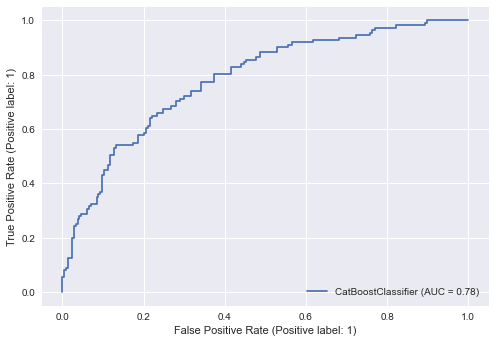

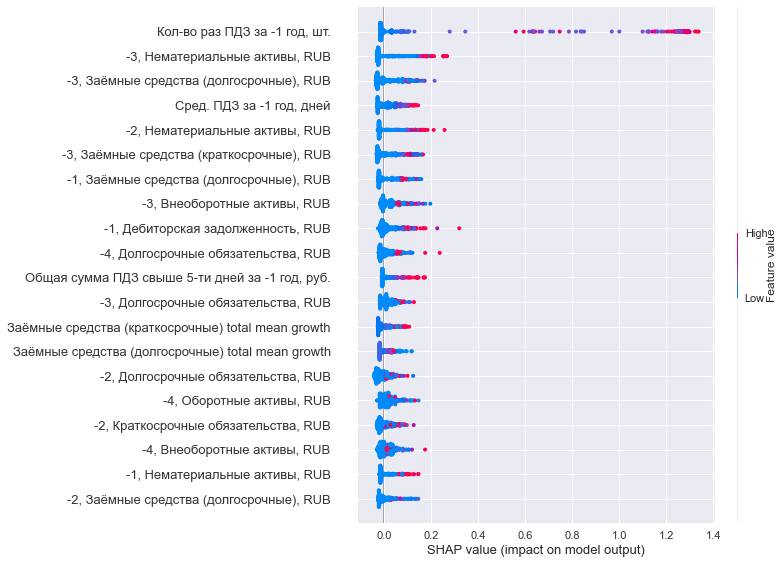

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7818
Fitting model <catboost.core.CatBoostClassifier object at 0x0000018AD71A0790> with treshold = 0.0...


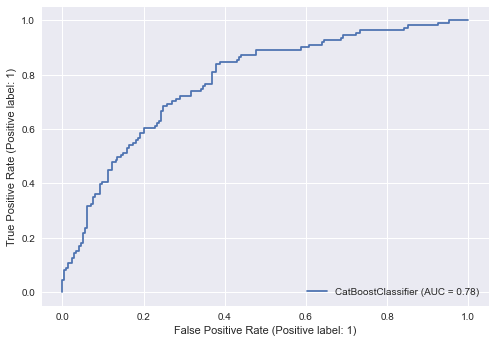

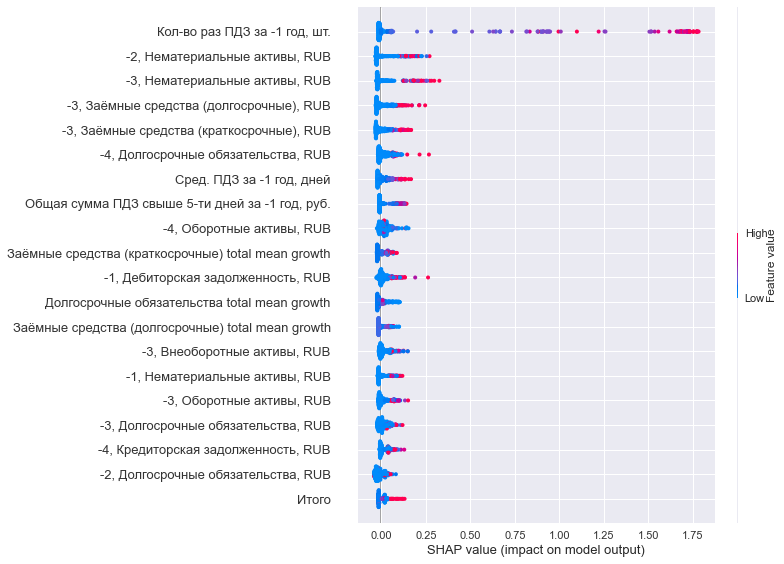

F1 = 0.566, Precision = 0.4038, Recall = 0.9459, Accuracy = 0.5046, ROC_AUC = 0.7768


In [18]:
make_report_with_best_threshold(model, df, to_file=False, file_path='../reports/report_1_test.csv', comment='add_growth=True')

## count_log_fin_vals=True

In [19]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=True, normalize_fin_columns=False)

In [20]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Fitting model <catboost.core.CatBoostClassifier object at 0x0000018AD85EDE50> with treshold = 0.5...


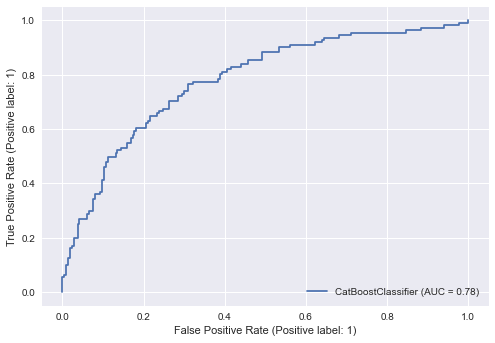

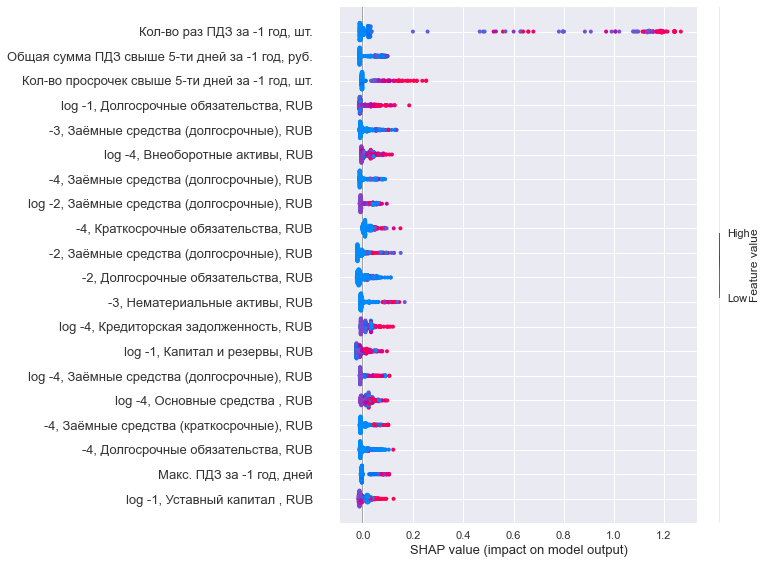

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7795
Fitting model <catboost.core.CatBoostClassifier object at 0x0000018AD85EDE50> with treshold = 0.0...


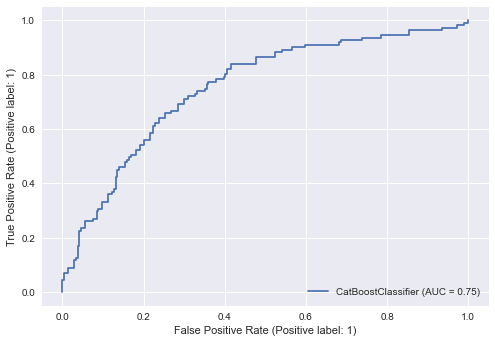

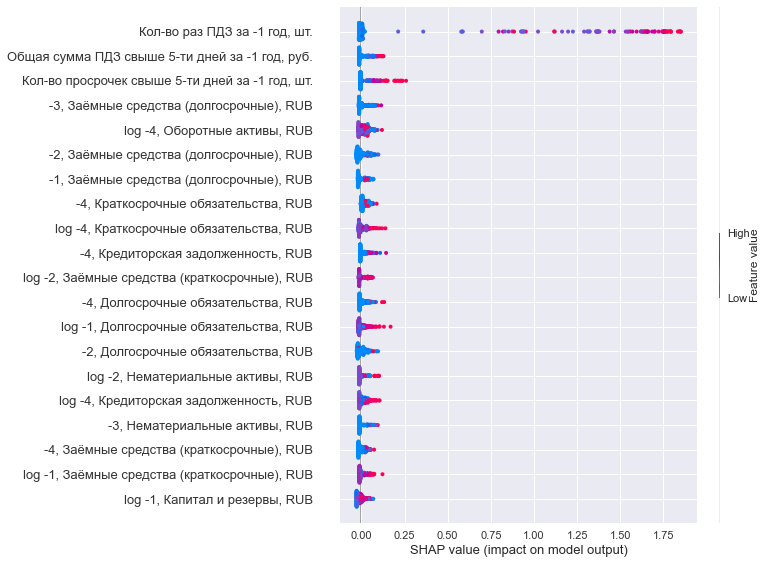

F1 = 0.5568, Precision = 0.3977, Recall = 0.9279, Accuracy = 0.4954, ROC_AUC = 0.7532


In [21]:
make_report_with_best_threshold(model, df, to_file=False, file_path='../reports/report_1_test.csv', comment='count_log_fin_vals=True')

## normalize_fin_columns=True

In [22]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=True)

In [23]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Fitting model <catboost.core.CatBoostClassifier object at 0x0000018AD88389A0> with treshold = 0.5...


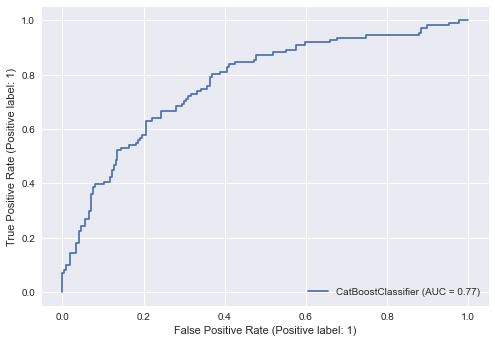

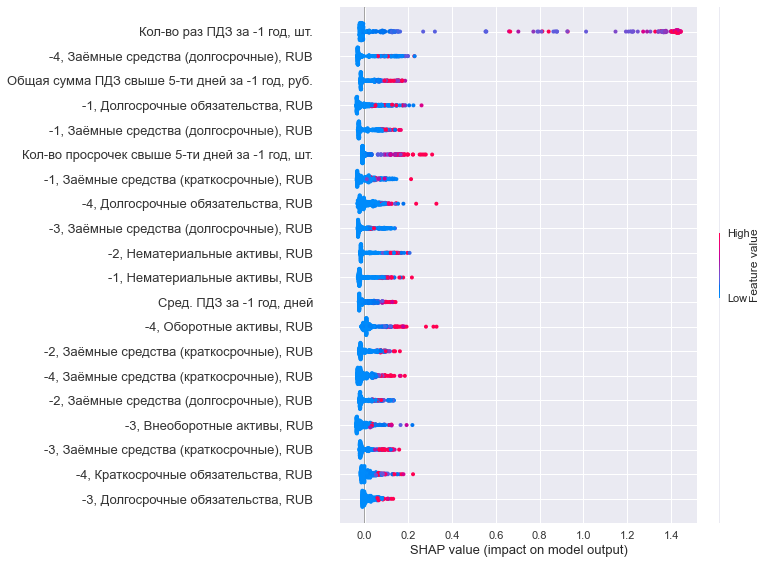

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7704
Fitting model <catboost.core.CatBoostClassifier object at 0x0000018AD88389A0> with treshold = 0.0...


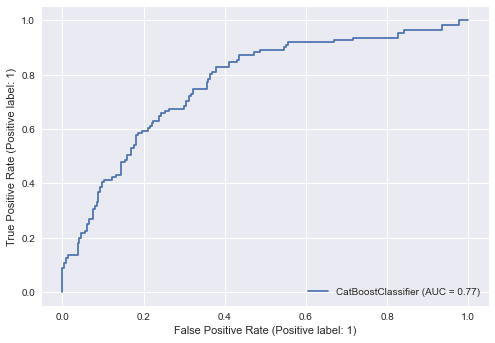

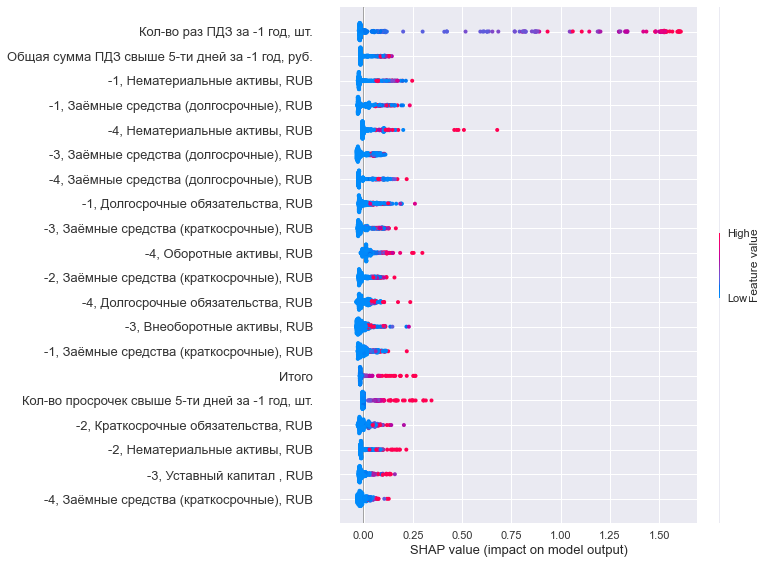

F1 = 0.5403, Precision = 0.3796, Recall = 0.9369, Accuracy = 0.4554, ROC_AUC = 0.7683


In [24]:
make_report_with_best_threshold(model, df, to_file=False, file_path='../reports/report_1_test.csv', comment='normalize_fin_columns=True')